# MgO Analysis Manual Scans

We start with manual scans from MgO 1800 nm short pulses

In [1]:
## necessary import statements
from HARP.scan_anal import Scan
from HARP.iris_functions import Iris
from HARP.image_processing import Image
import os
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter, peak_widths
import numpy as np 
import matplotlib.pyplot as plt
from functions import Andor_calib
from functions import Adams_wedge_thickness, gaus
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
#Iris calibration from 28th Jan at 1800 nm short pulse
""" 1800 nm scans"""
power = np.array([780 ,745 ,635 ,490 ,300 ,95 ,10 ,10.5 ,14 ,20 ,26 ,33 ,41 ,50 ,59 ,69 ,80 ,10
,6 ,3 ,1.2 ,0 ,470])*1e-3
iris_pos = np.array([45,30,15	,0,-15,-30,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-40,-41,-42,-43,-44,0])


iris_27 = Iris()
iris_27.specify_calib(iris_positions=iris_pos, powers=power)
iris_27.specify_params(w0_init=100e-6, f=0.75, wl=800e-9, M2=1, reprate=1000,pulse_duration=15e-15)


In [4]:
data_folder = '/Volumes/qolslc/20120009 - Matthews' 
data_folder = os.path.join(data_folder,'2022-01-27')
os.listdir(data_folder)

['MgO_Test.tif',
 'Rotation_Scan_MgO_30000trans_min22deg',
 'Rotation_Scan_MgO_30000trans_min22deg_coarse',
 'Iris_Scan_MgO_800_trans40000',
 'Iris_Scan_MgO_800_trans70000',
 'min45deg_nolaserbackgd.tif',
 'Iris_Scan_MgO_800_trans90000',
 '0deg.tif']

# Trans 30000
Manual Scans but this is the data we have from the MgO

In [20]:
folder = os.path.join(data_folder,'Rotation_Scan_MgO_30000trans_min22deg_coarse')


In [21]:
Rot = Scan()
Rot.set_folder(folder)
Rot.set_verlim(0, 5000)
files = [i for i in os.listdir(folder)]
bg = []
exclude = bg+[]
files = [i for i in files if i not in exclude]
print(files)

['160deg_3.7z.tif', '140deg_3.7z.tif', '160deg_6.8z.tif', '180deg_3.0z.tif', '180deg_7.0z.tif', '180deg_4.0z.tif', '200deg_4.9z.tif', '180deg_5.0z.tif', '180deg_5.5z.tif', '180deg_3.5z.tif', '20deg.tif', '180deg_4.9z.tif', '180deg_6.5z.tif', '120deg_2.7z.tif', '60deg.tif', '180deg_4.5z.tif', '40deg.tif', '0deg.tif', '100deg_2.7.tif', '80deg.tif', '180deg_6.z.tif']


In [24]:
files[1].split('d')

['140', 'eg_3.7z.tif']

In [25]:
variables = [float(i.split('d')[0]) for i in files]
Rot.set_params(wedge=1060, MCPPos=30000,iris=-22)
Rot.set_eVlim((8,35))
stage = 'rotation'
variables.sort()

print(variables)

[0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 160.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 200.0]


In [26]:
Rot.populate_scan_manual(files, variables, stage=stage, function = Andor_calib)
Rot.add_calibration_stage('intensity', iris_27.get_intensity_TWcm2, 'iris')
Rot.substract_bg(byitself=True, bg_lim=[0,0,10,10])
Rot.sort_by_stage(stage)

100%|██████████| 21/21 [00:24<00:00,  1.16s/it]


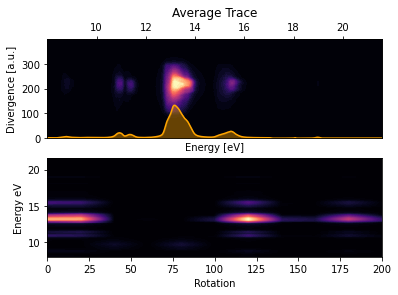

In [27]:
fig, ax = plt.subplots(2)
im, ax[0], ax2 = Rot.plot_average(ax[0])
ax[0].set_title('Average Trace')
ax[0].xaxis.tick_top()
ax[0].set_xlabel('Energy [eV]', va = 'top')
ax[0].set_ylabel('Divergence [a.u.]')
im, ax[1] = Rot.plot_scan_mean(ax[1], stage)
ax[1].set_xlabel('Rotation')
ax[1].set_ylabel('Energy eV')
plt.show()

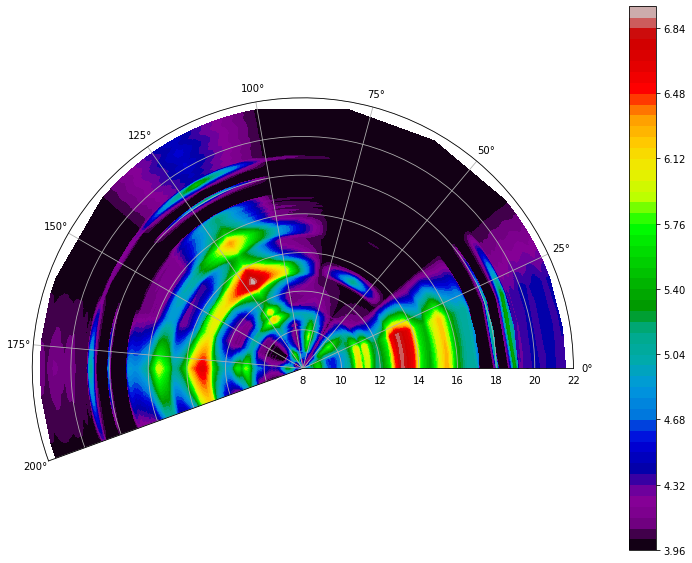

In [28]:

x, y, Z = Rot.return_scan_data('rotation')
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(20,10))
r,theta = np.meshgrid(y,np.radians(x))
vmin = 10000
Z[Z<vmin]=vmin
pc = ax.contourf(theta, r, np.log10(Z), levels=50, cmap='nipy_spectral')
ax.set_thetalim(np.radians(min(x)), np.radians(max(x)))
ax.set_rlim(8,22)
cbc = plt.colorbar(pc, ax=ax)



# Intensity Scans

## Making the scan

In [67]:
folder = os.path.join(data_folder,'Iris_Scan_MgO_800_trans40000')
scan = Scan()
scan.set_folder(folder)
scan.set_verlim(0, 5000)
files = [i for i in os.listdir(folder)]
bg = []
exclude = bg+[]
files = [i for i in files if i not in exclude]
print(files)



['min35deg.tif', 'min24deg.tif', 'min22deg.tif', 'min27deg.tif', 'min31deg.tif', 'min30deg.tif', 'min32deg.tif', 'min23deg.tif', 'min26deg.tif', 'min25deg.tif', 'min29deg.tif', 'min37deg.tif', 'min33deg.tif', 'min28deg.tif']


In [68]:
variables = [-1*float(i.split('d')[0].split('n')[1]) for i in files]
scan.set_params(wedge=1060, MCPPos=40000,iris=-22)
scan.set_eVlim((8,35))
stage = 'intensity'
variables.sort()

print(variables)

[-37.0, -35.0, -33.0, -32.0, -31.0, -30.0, -29.0, -28.0, -27.0, -26.0, -25.0, -24.0, -23.0, -22.0]


In [69]:
scan.populate_scan_manual(files, variables, stage='iris', function = Andor_calib)
scan.add_calibration_stage('intensity', iris_27.get_intensity_TWcm2, 'iris')
scan.substract_bg(byitself=True, bg_lim=[0,0,10,10])
scan.sort_by_stage(stage)


100%|██████████| 14/14 [00:07<00:00,  1.94it/s]


In [70]:
scan.substract_bg(byitself=True, bg_lim=[0,0,10,10])

## Seeing what it looks like

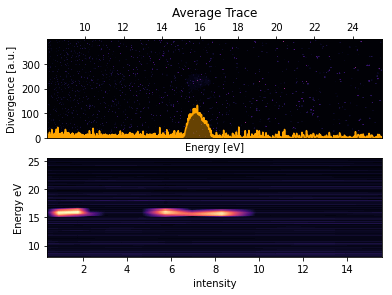

In [71]:
fig, ax = plt.subplots(2)
im, ax[0], ax2 = scan.plot_average(ax[0])
ax[0].set_title('Average Trace')
ax[0].xaxis.tick_top()
ax[0].set_xlabel('Energy [eV]', va = 'top')
ax[0].set_ylabel('Divergence [a.u.]')
im, ax[1] = scan.plot_scan_mean(ax[1], stage)
ax[1].set_xlabel(stage)
ax[1].set_ylabel('Energy eV')
plt.show()

In [79]:
df = scan.scan_data[scan.scan_data['iris']<=-25]

In [80]:
x, y, Z = scan.return_scan_data('intensity',df)

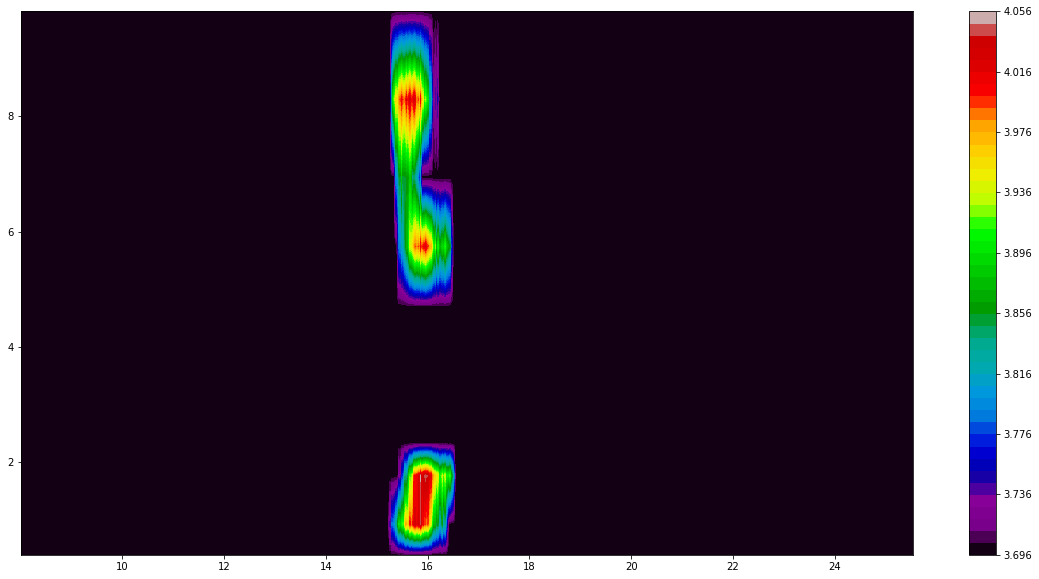

In [81]:
fig, ax = plt.subplots(figsize = (20,10))
vmin=5000
Z[Z<vmin]=vmin
cma = ax.contourf(y,x,np.log10(Z), levels=50, cmap='nipy_spectral')
cba = plt.colorbar(cma, ax=ax)


In [124]:
tr = scan.scan_data[scan.scan_data['iris']==-24]['Data'].values[0]

In [125]:
tr.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

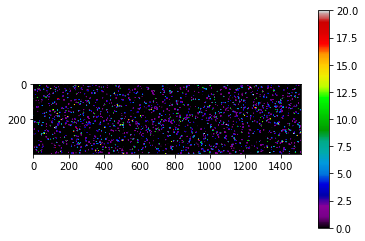

In [126]:
plt.imshow(tr.data, cmap='nipy_spectral', vmax=20)
plt.colorbar()